In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('train.csv')
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


# Построить график распределения целевой переменной. Сделать выводы

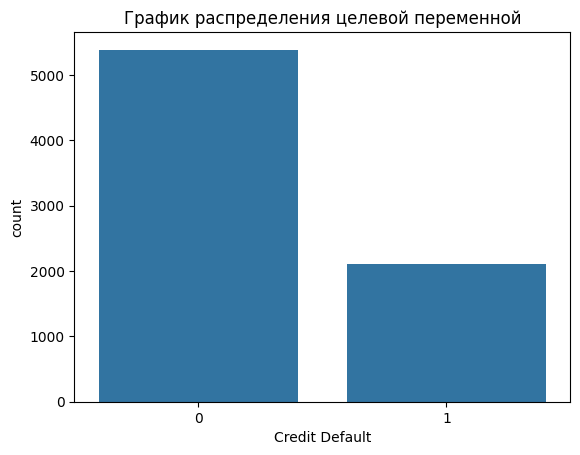

In [48]:
sns.countplot(data=df, x='Credit Default')

plt.title('График распределения целевой переменной')
plt.show()

Видим что у нас дисбаланс классов (нулей больше чем единиц) - люди выплачивают кредит вовремя чаще, чем просрочивают

# Построить гистограммы для наиболее проблемных признаков (используйте выводы из первого ДЗ). Сделайте по ним выводы.

In [49]:
feature_columns_cat = ['Tax Liens', 'Years in current job', 'Number of Credit Problems', 'Number of Open Accounts', 'Bankruptcies', 'Purpose']
feature_columns_num = ['Annual Income', 'Years of Credit History', 'Maximum Open Credit', 
                       'Months since last delinquent', 'Current Loan Amount', 'Current Credit Balance', 'Credit Score', 'Monthly Debt']

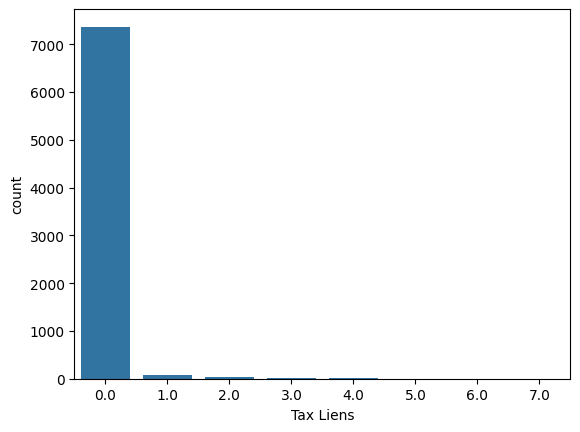

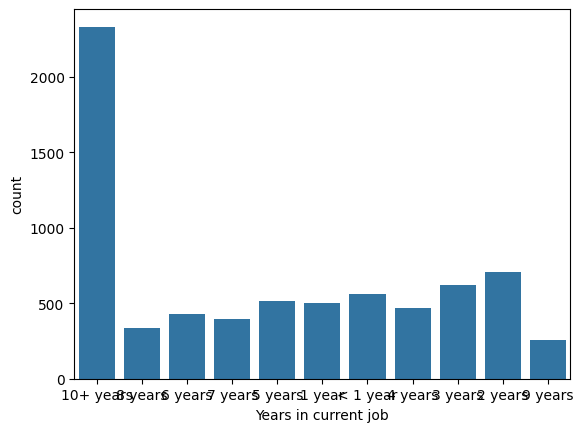

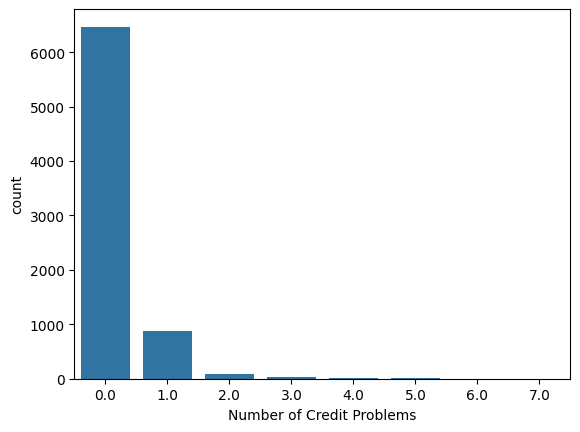

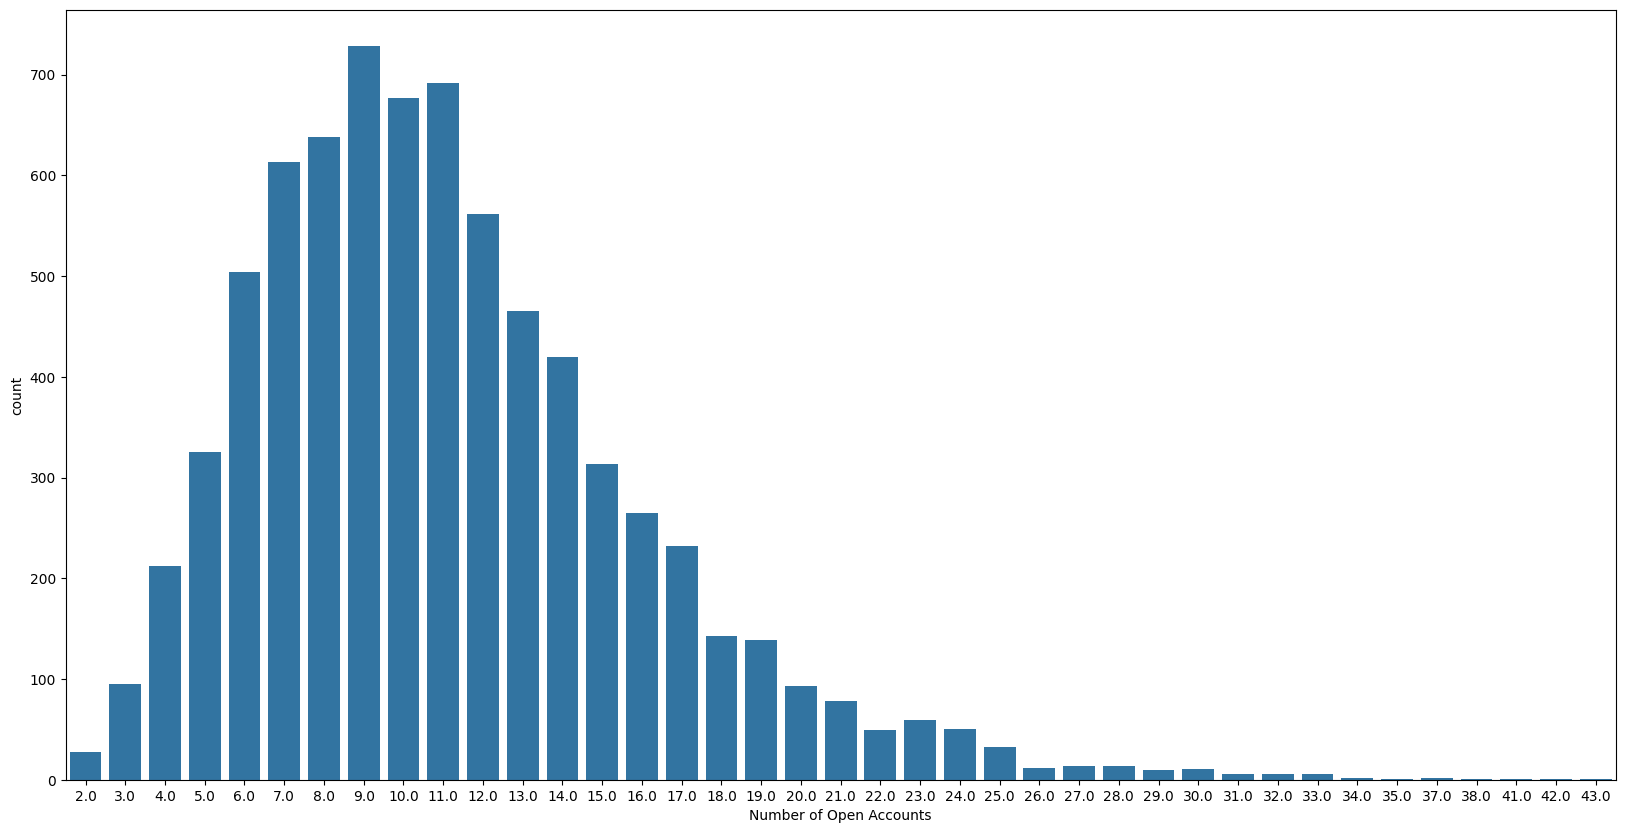

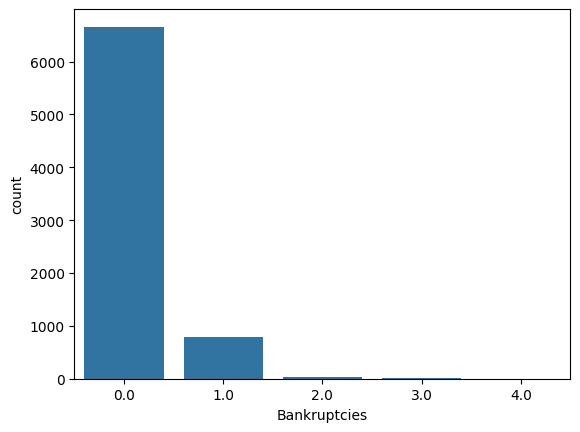

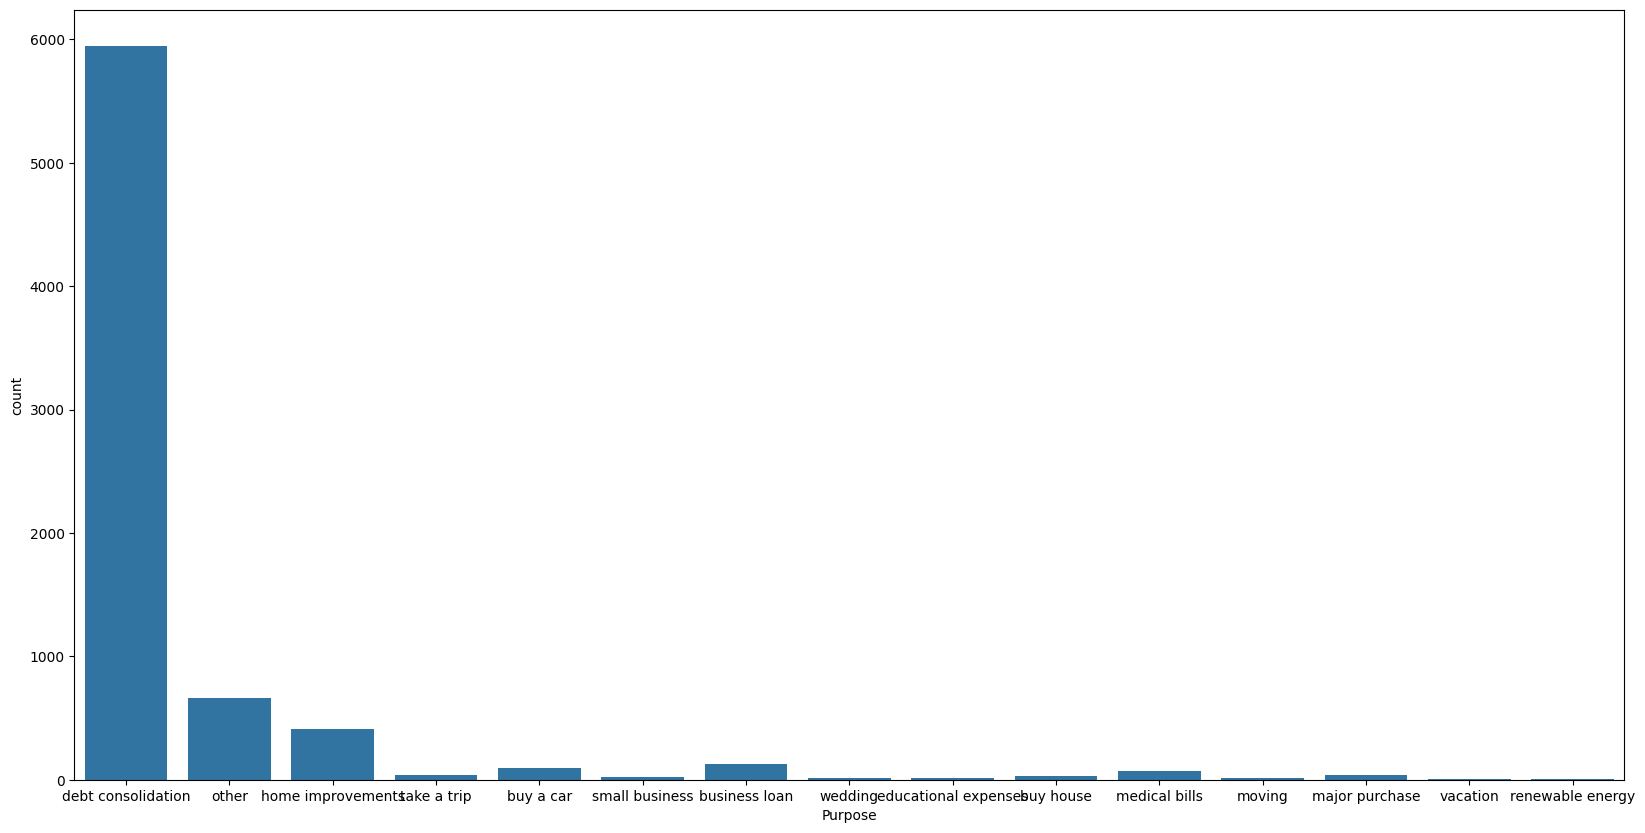

In [50]:
for feature in feature_columns_cat:
    if feature != 'Purpose' and feature != 'Number of Open Accounts':
        sns.countplot(data=df, x=feature)
        plt.show()
    else:
        plt.figure(figsize=(20, 10))
        sns.countplot(data=df, x=feature)
        plt.show()


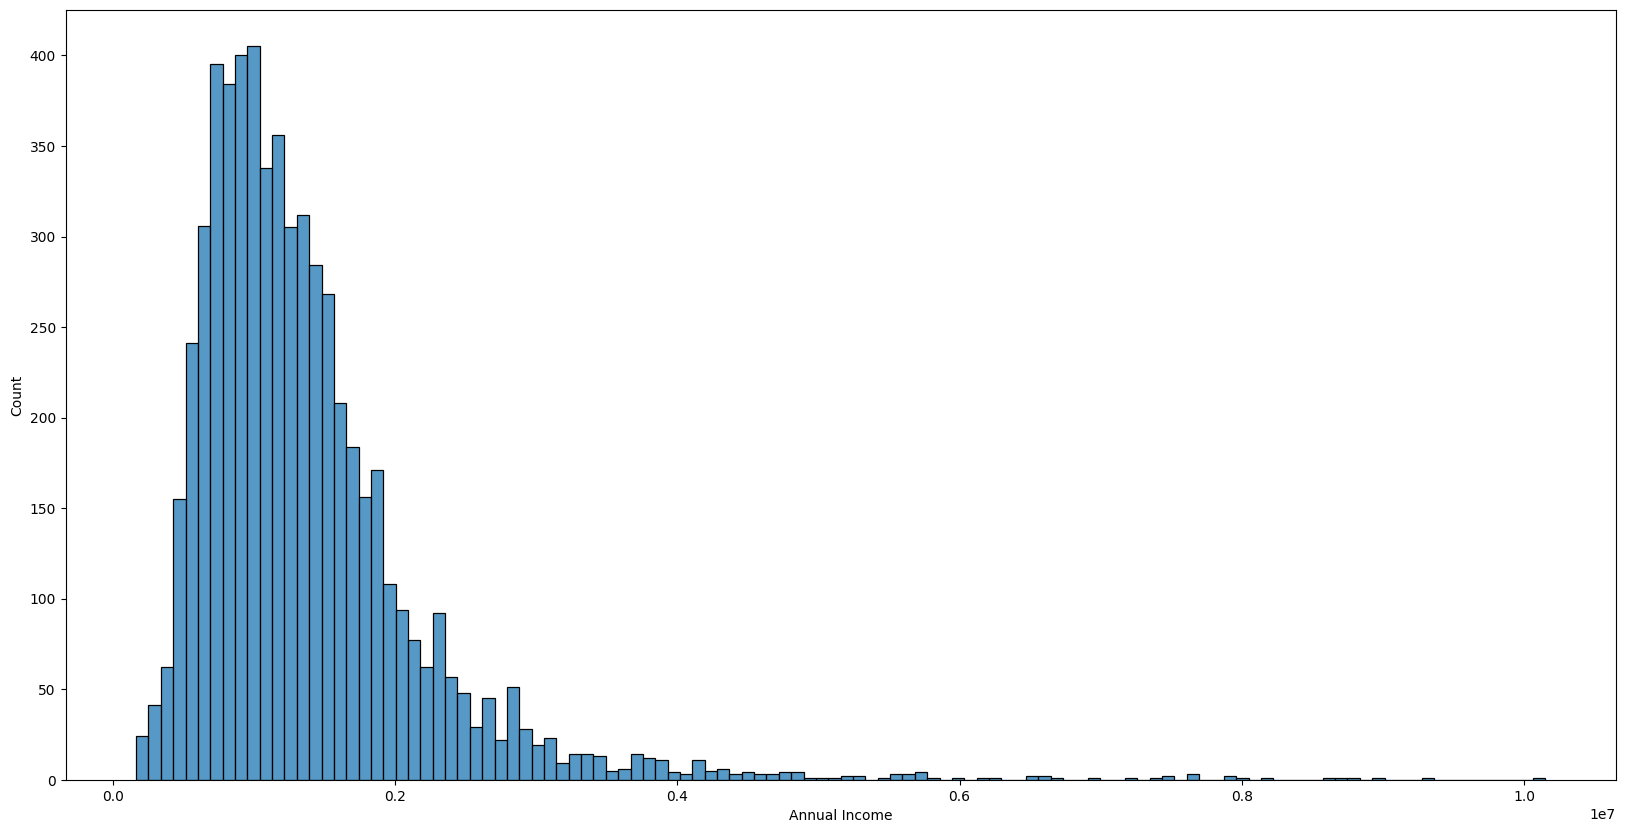

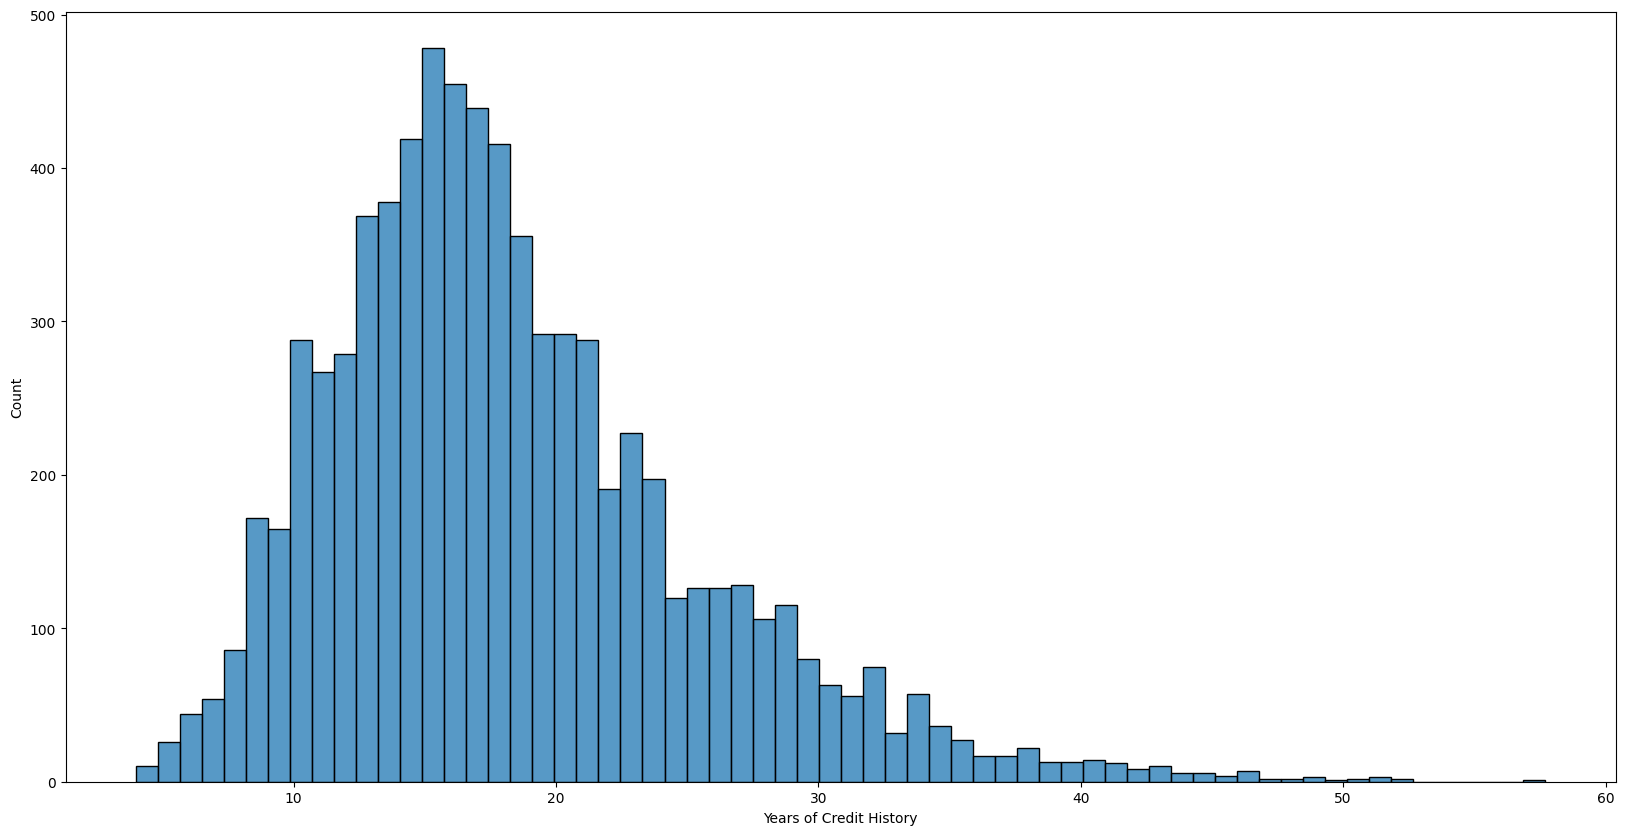

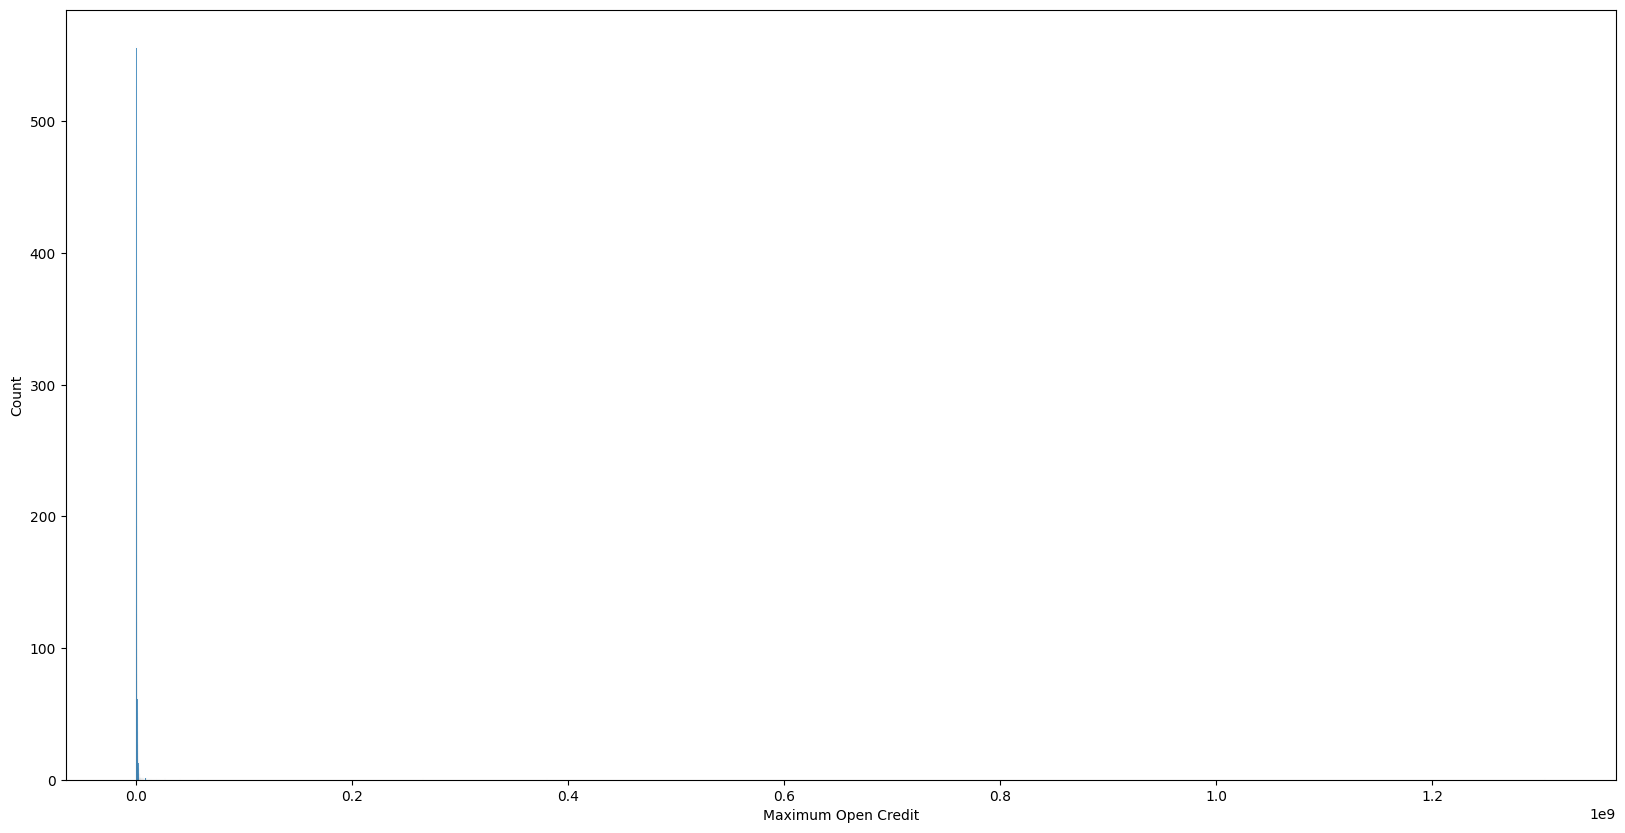

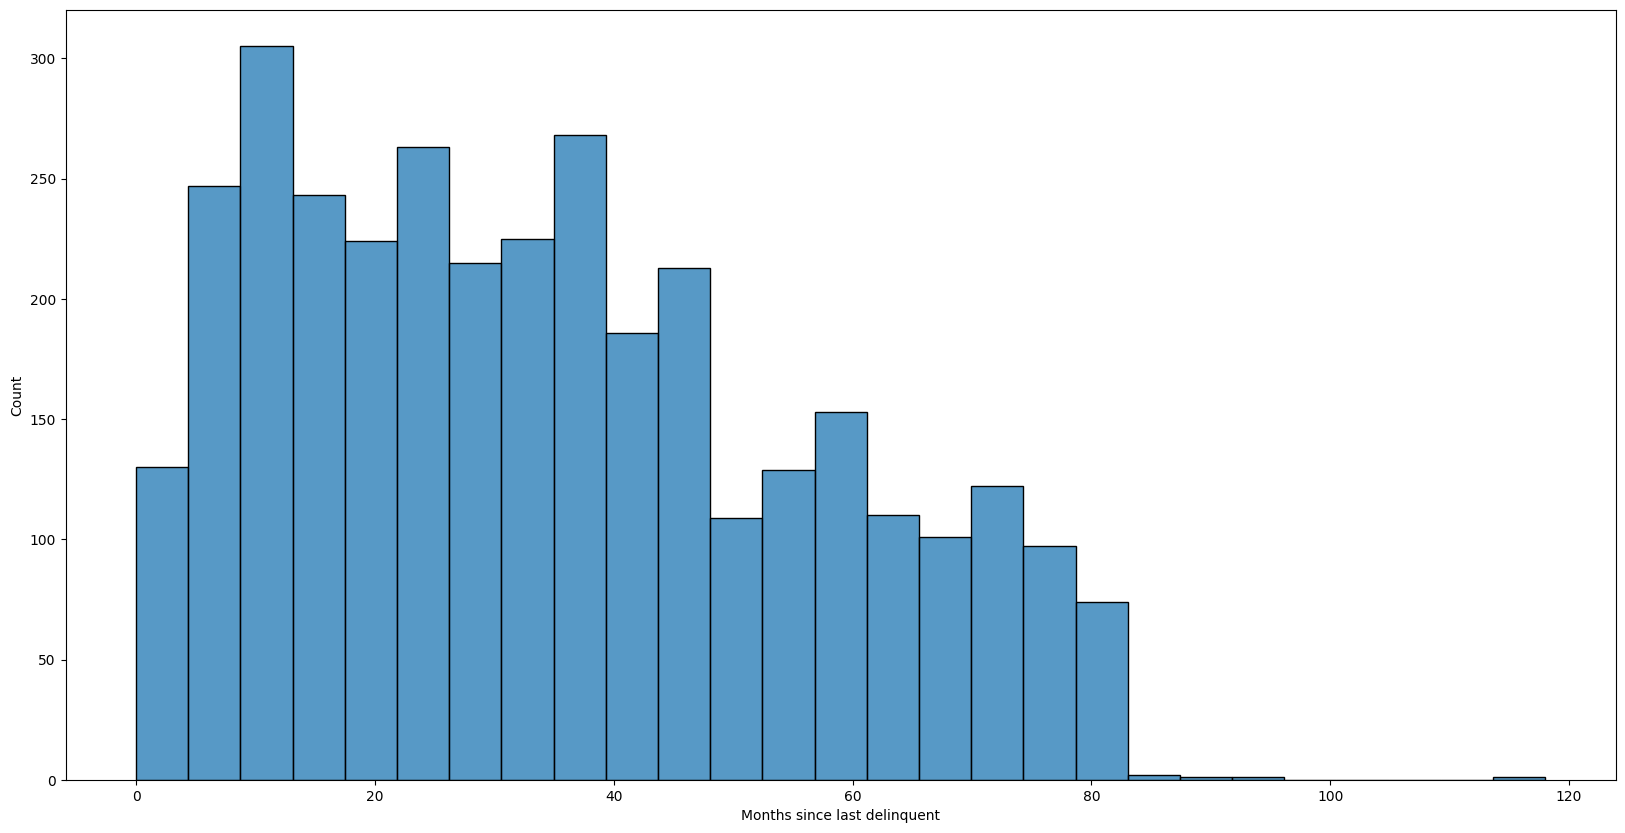

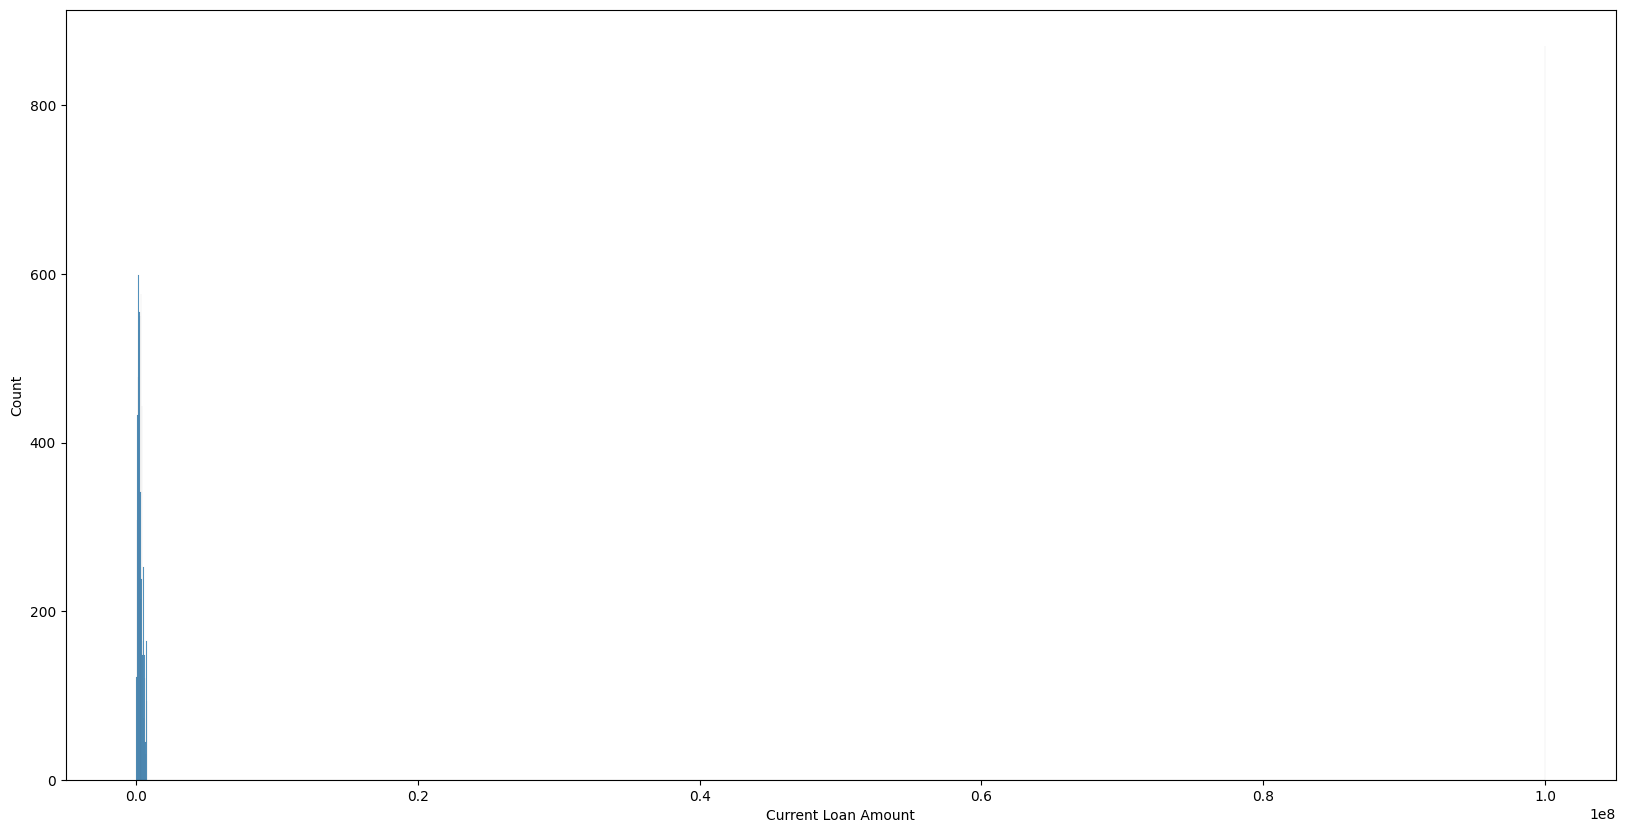

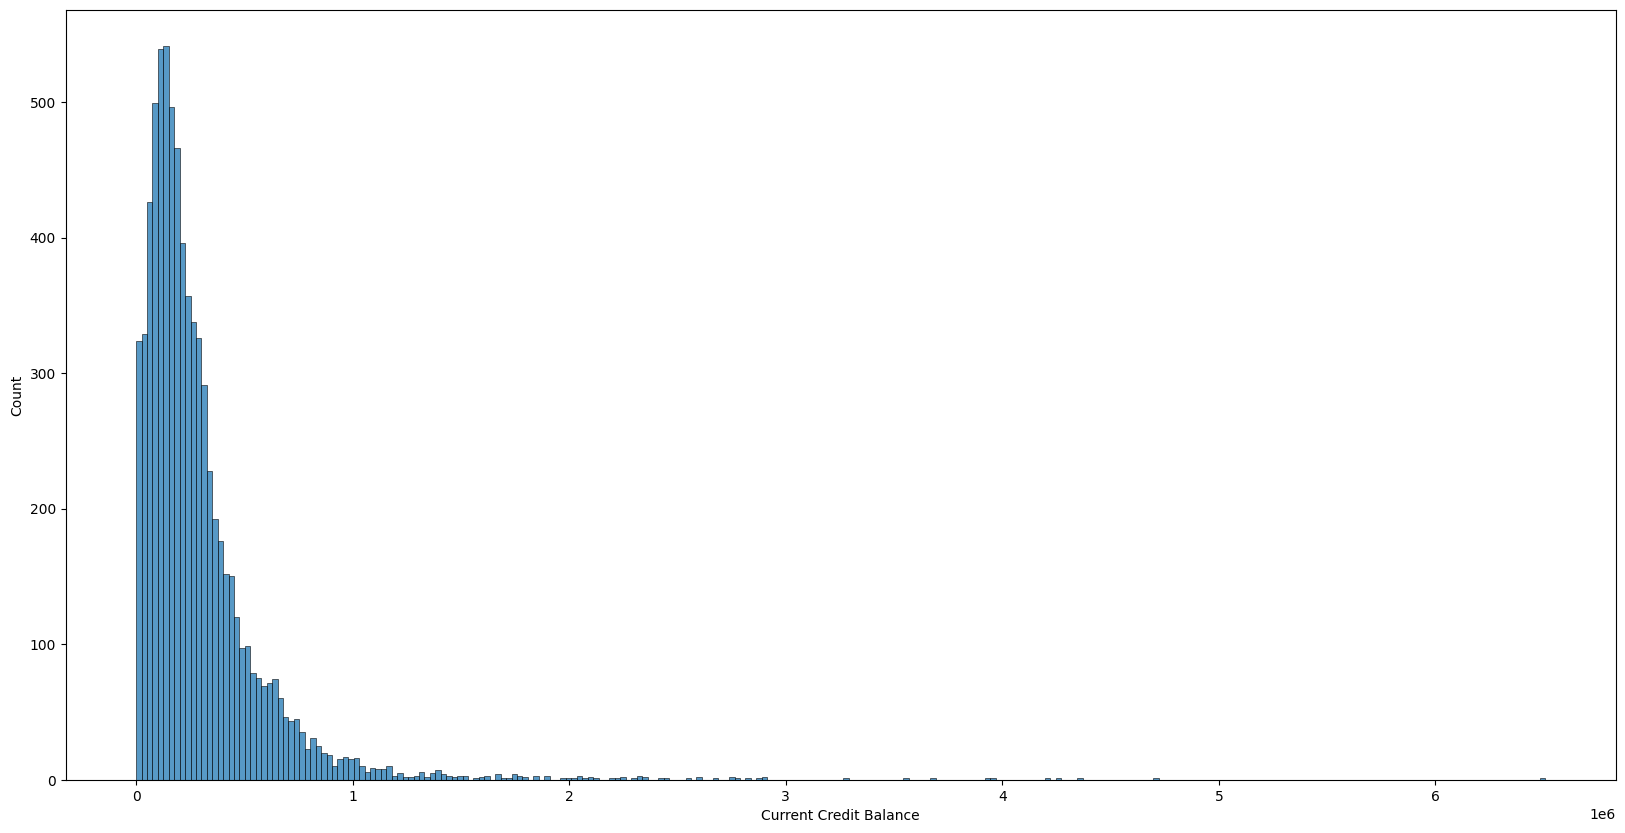

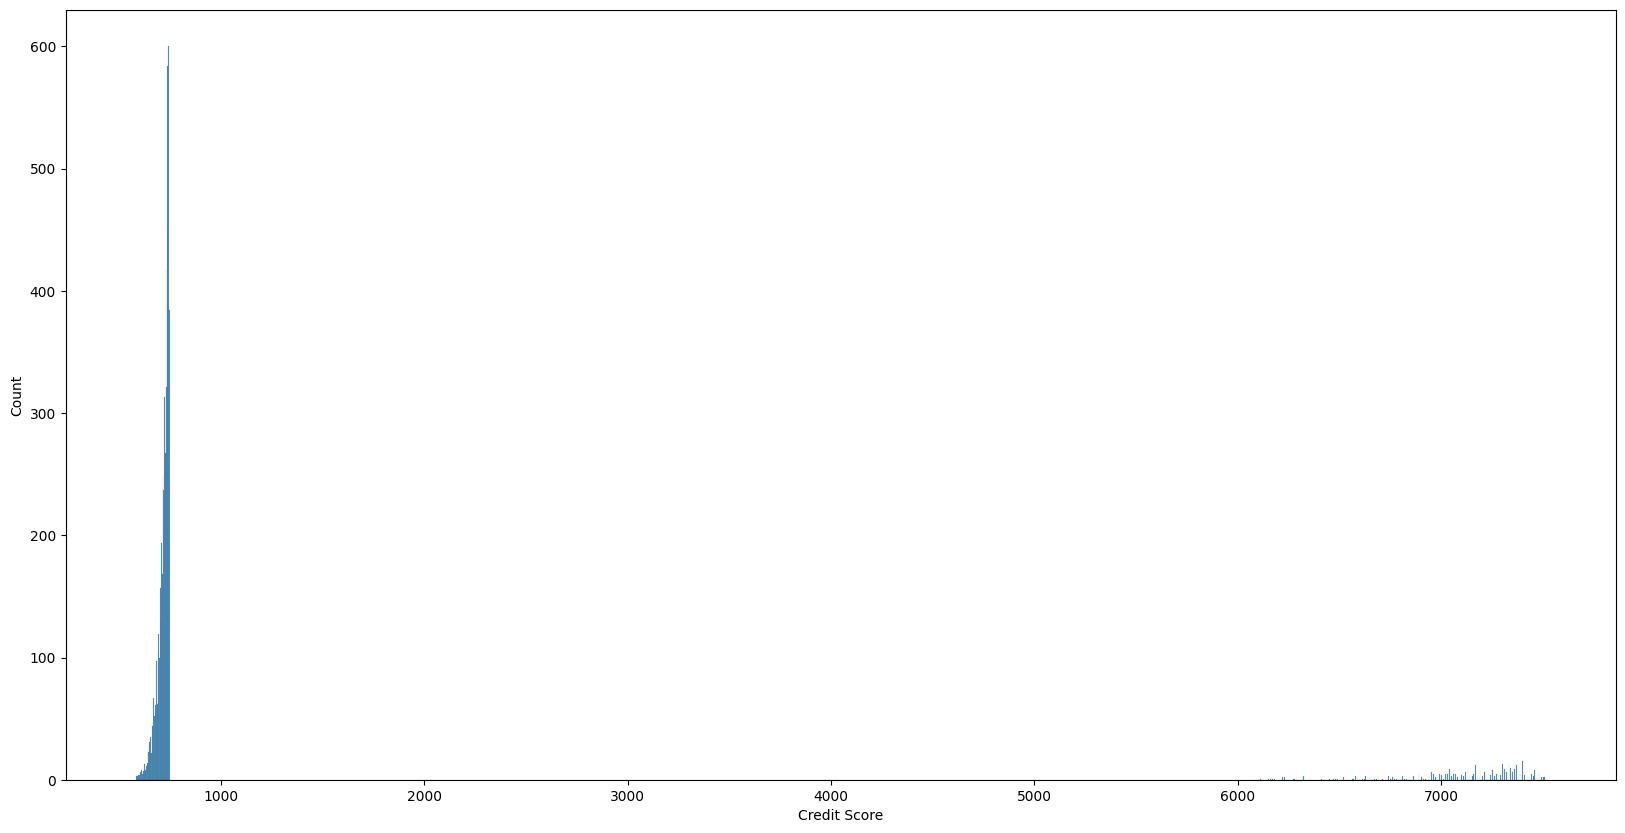

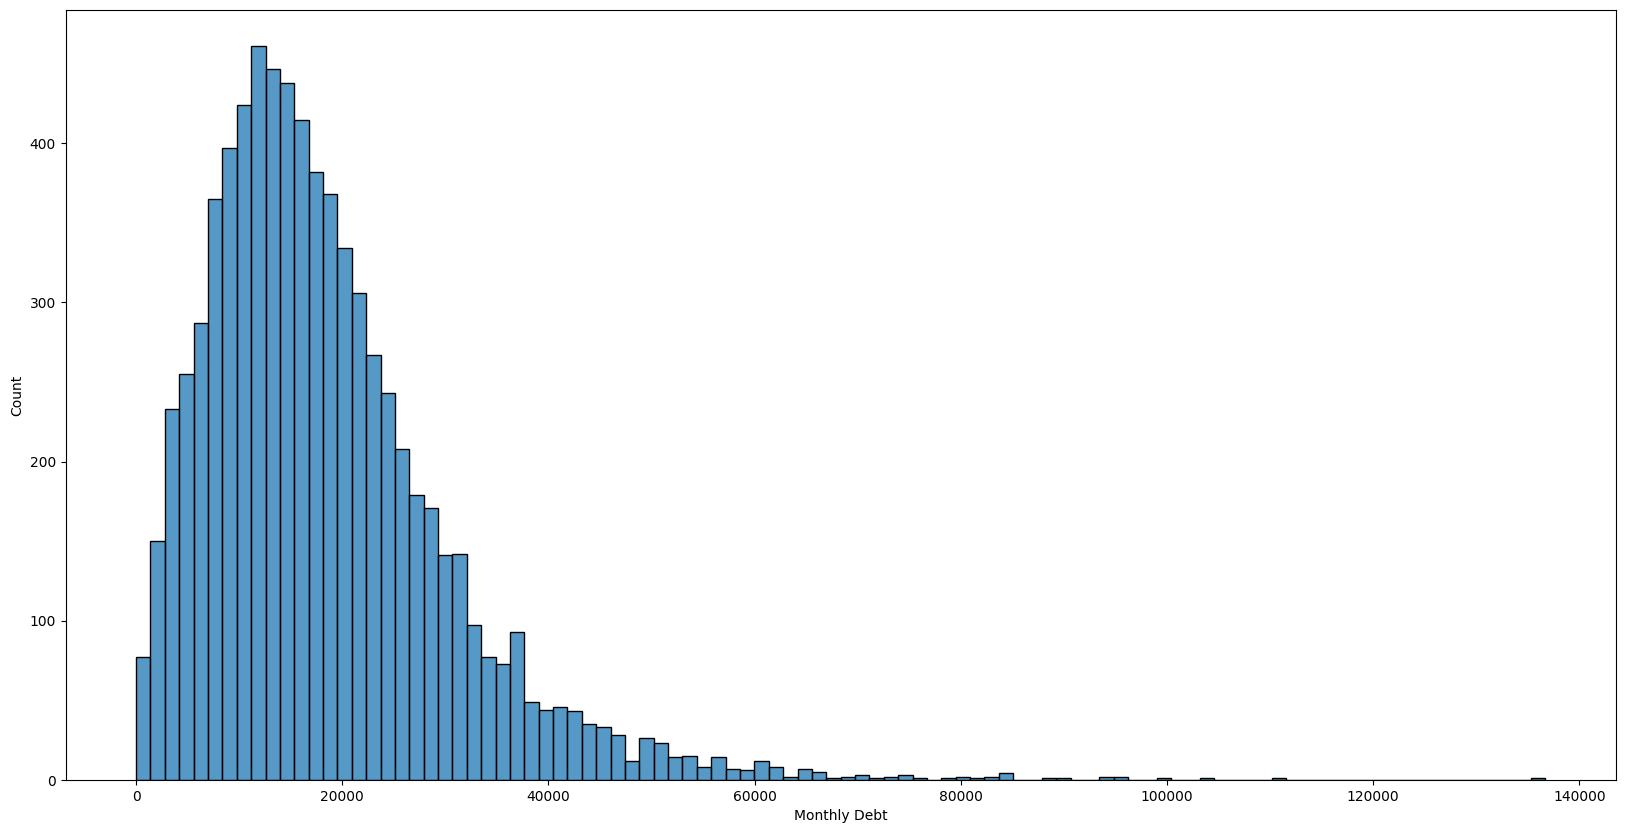

In [ ]:
for feature in feature_columns_num:
    
    plt.figure(figsize=(20, 10))
    sns.histplot(data=df, x=feature)

Tax Liens - дисбаланс классов

Years in current job - небольшой но дисбаланс данных

Number of Credit Problems - дисбаланс данных

Number of Open Accounts - выбросы после 25

Bankruptcies - дисбаланс данных

Purpose - дисбаланс данных

Annual Income - длинный хвост

Years of Credit History - длинный хвост

Maximum Open Credit - очень сильные выбросы

Months since last delinquent - значения больше 80 очень маленькое количество

Current Loan Amount - очень сильные выбросы

Current Credit Balance - длинный хвост

Credit Score - очень сильные выбросы

Monthly Debt - длинный хвост

# Построить матрицу корреляций признаков и целевой переменной. Сделайте выводы.

In [58]:
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [64]:
corr_features = df.select_dtypes(['float16', 'float32', 'float64', 'int64']).columns.to_list()
corr_features

['Annual Income',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score',
 'Credit Default']

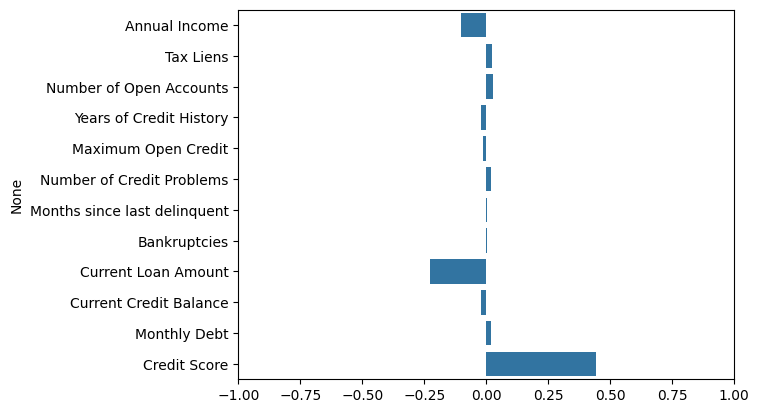

In [79]:
corr_matrix = df.loc[:, corr_features].corr()

sns.barplot(x=corr_matrix.loc[:, 'Credit Default'][:-1].values, y=corr_matrix.loc[:, 'Credit Default'][:-1].index)
plt.xlim(-1.0, 1.0)
plt.show()

На графике видно что у нас сильная линейная связь с такими признаками как: Annual Income, Current Loan Amount, Credit Score

# Сравните распределения признаков из train.csv и test.csv

In [80]:
train = df.copy()
test = pd.read_csv('test.csv')

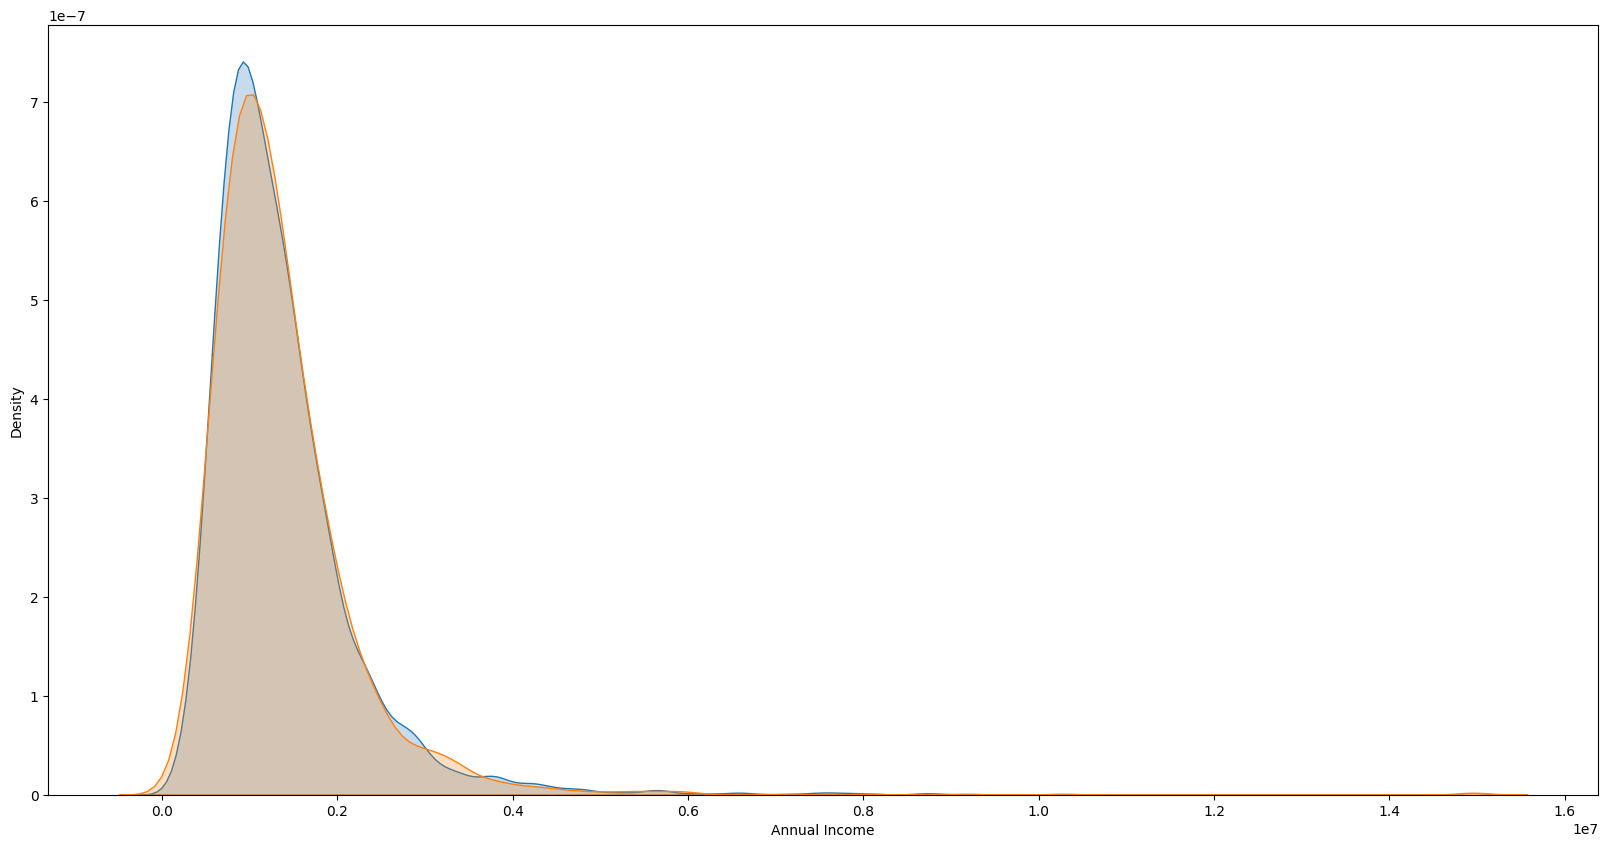

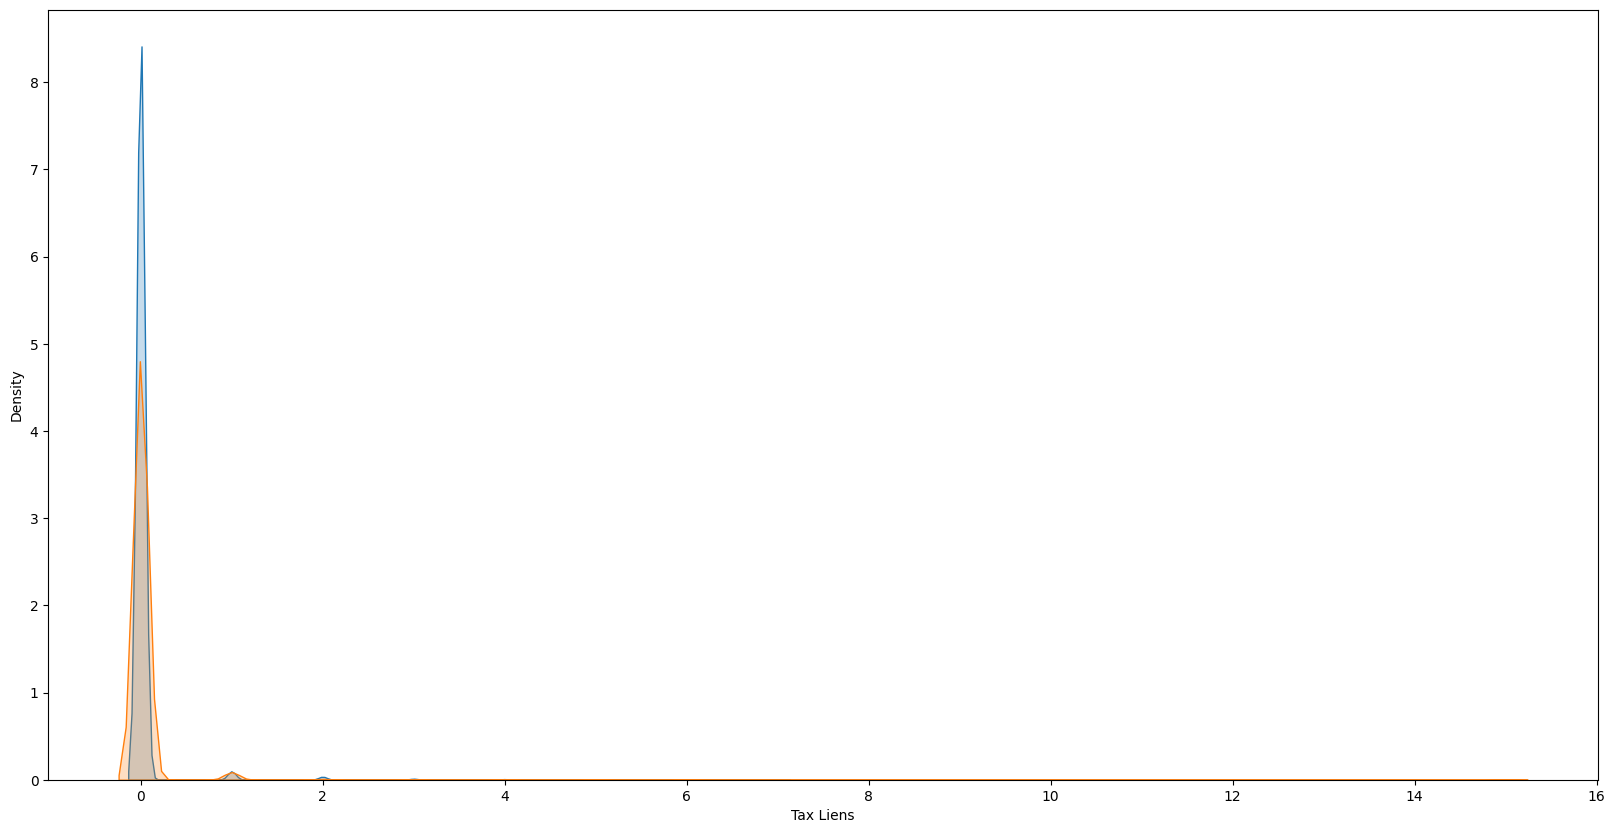

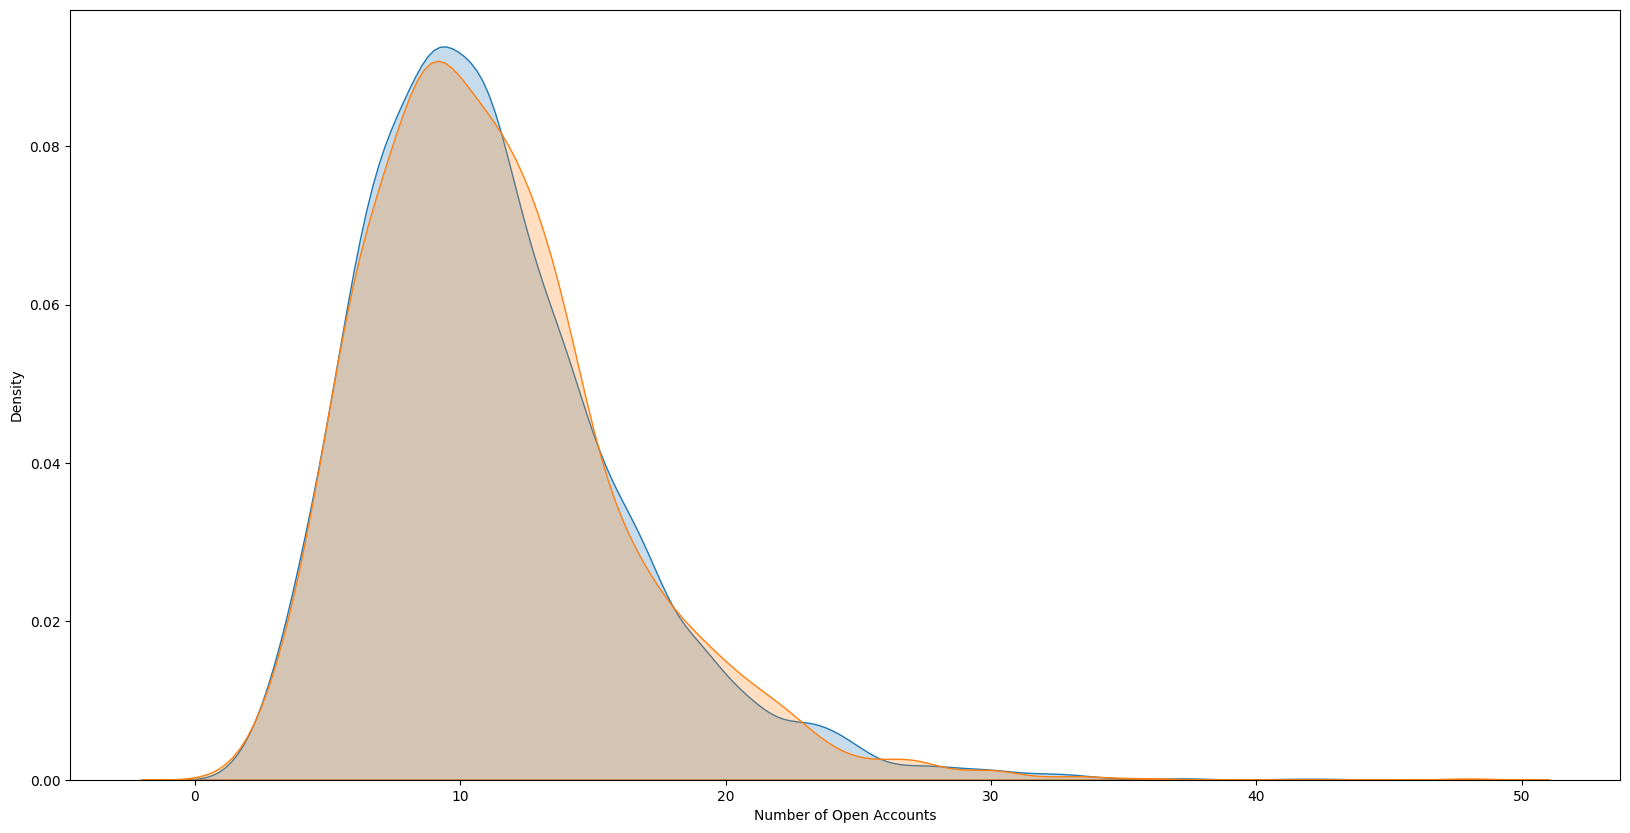

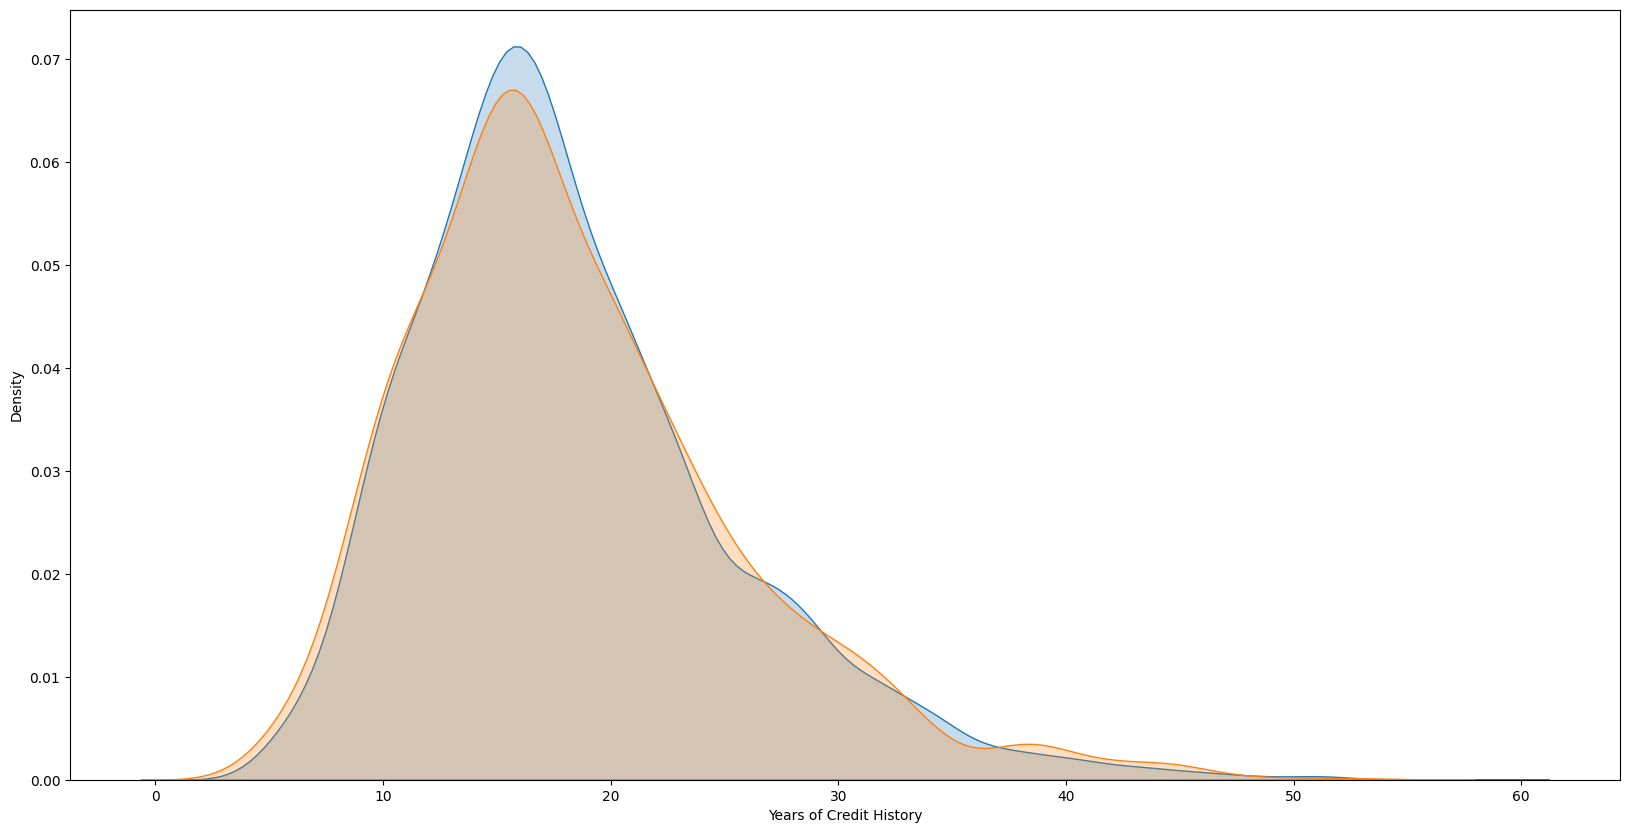

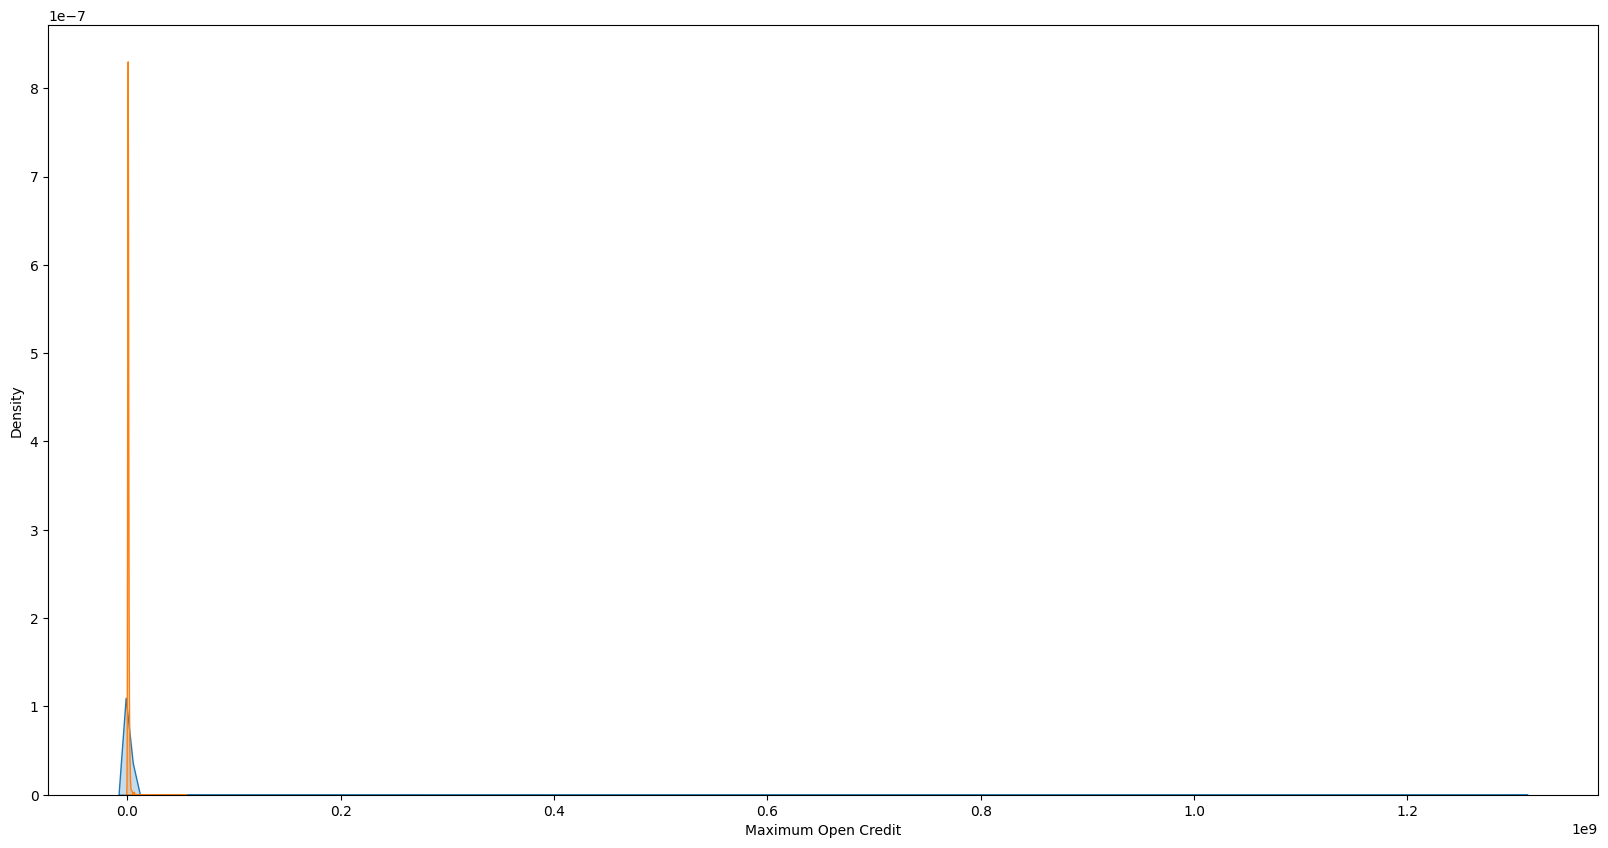

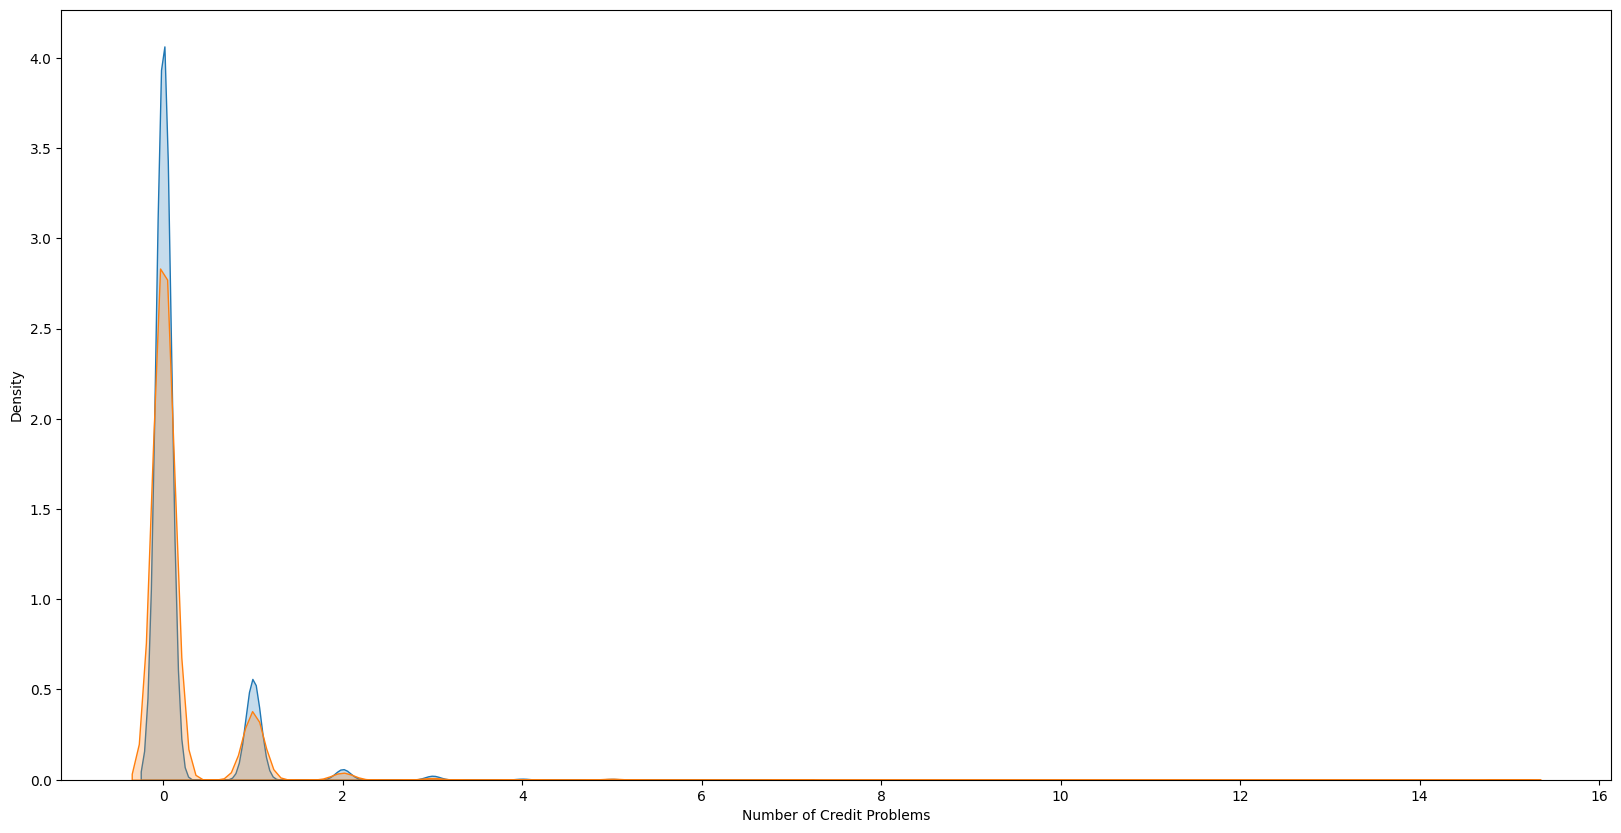

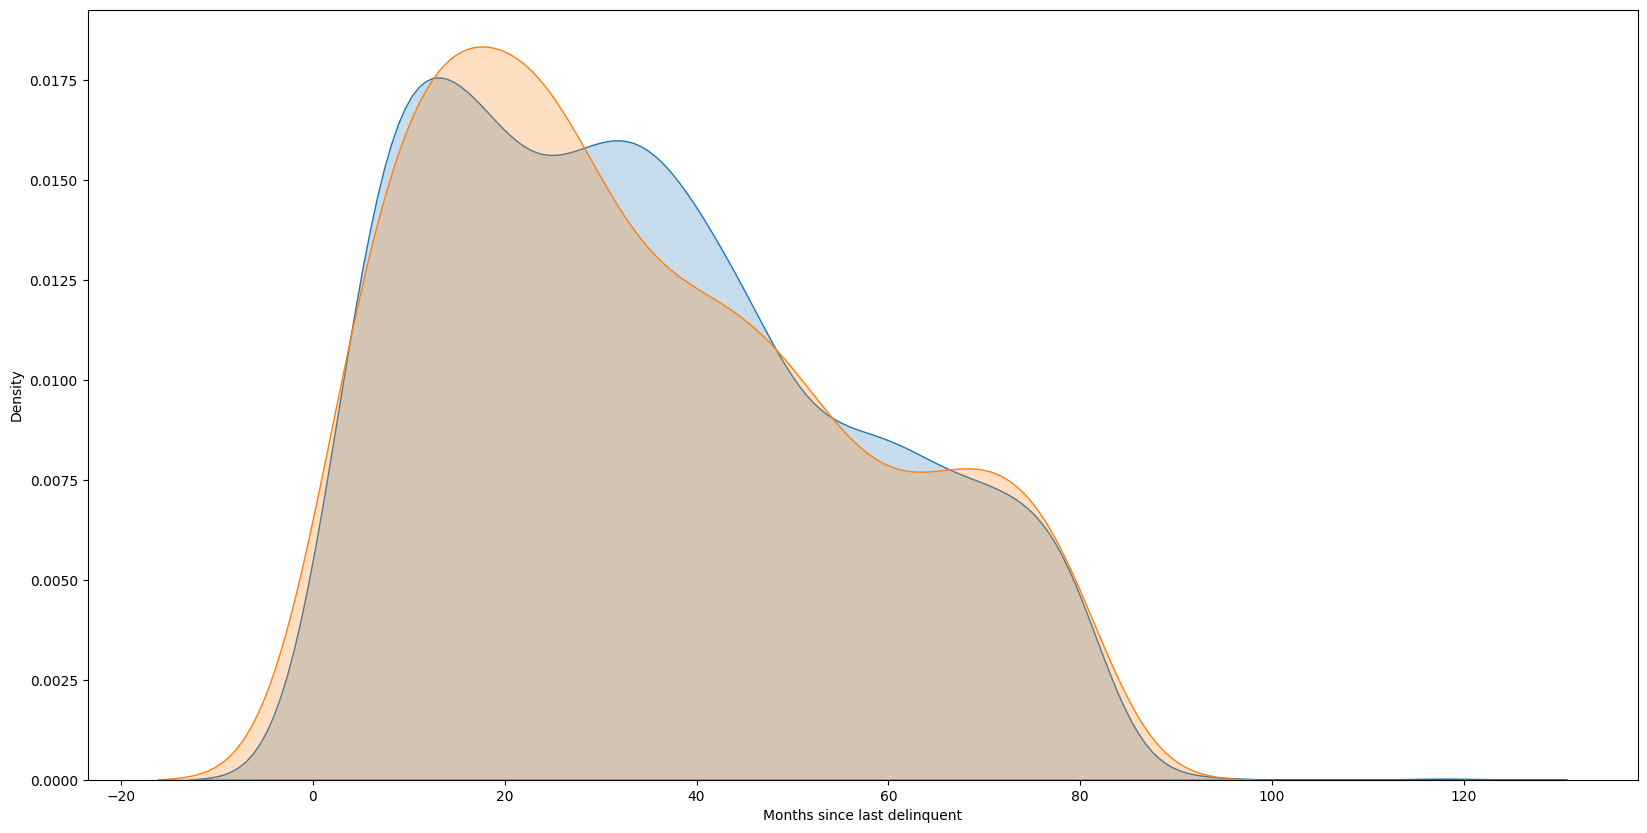

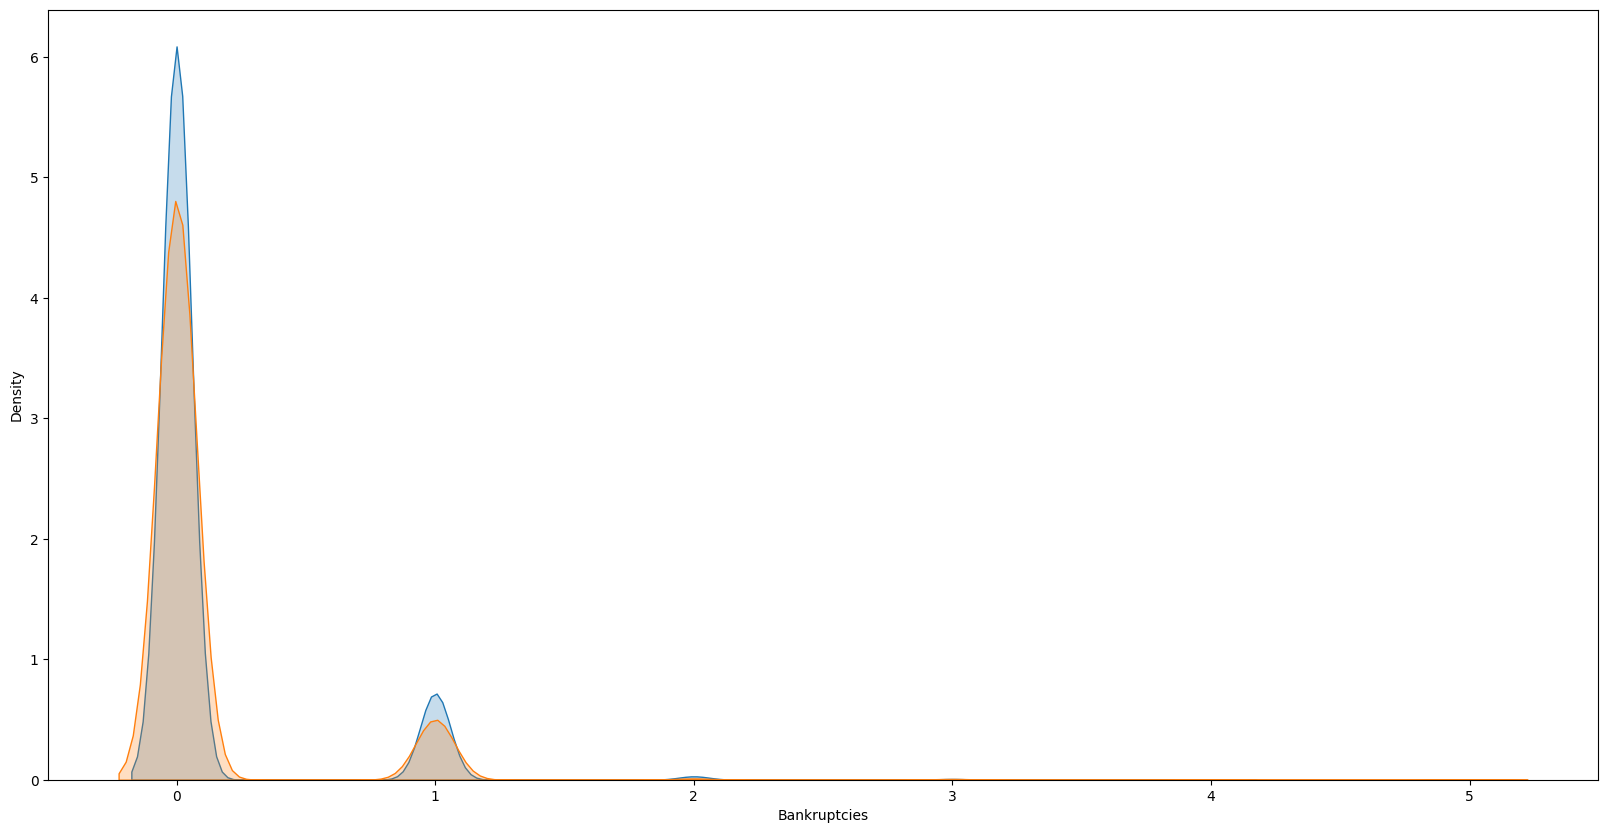

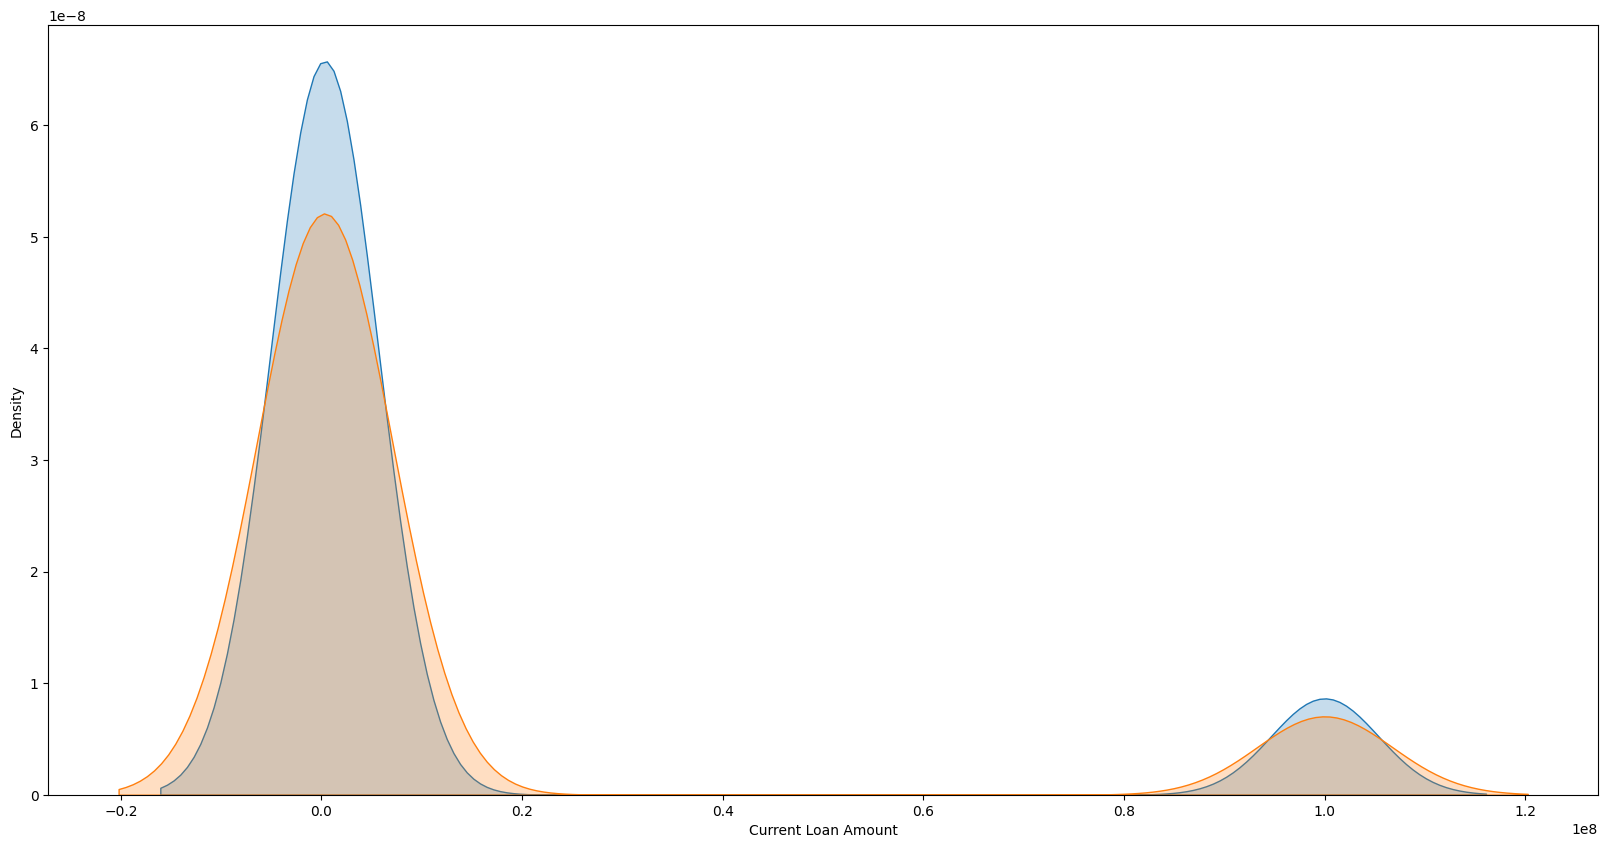

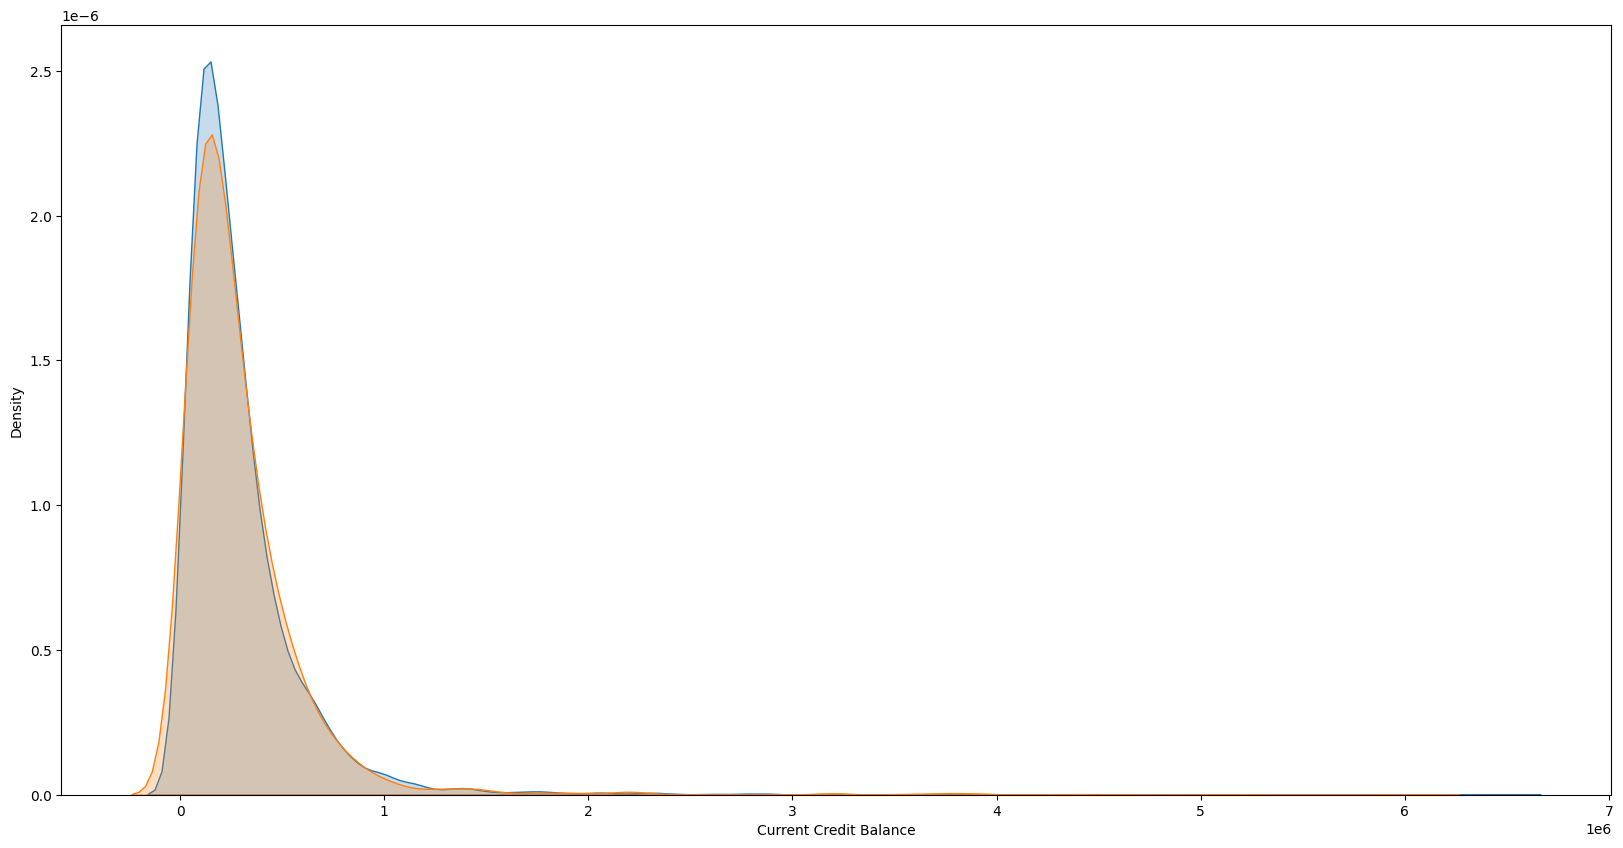

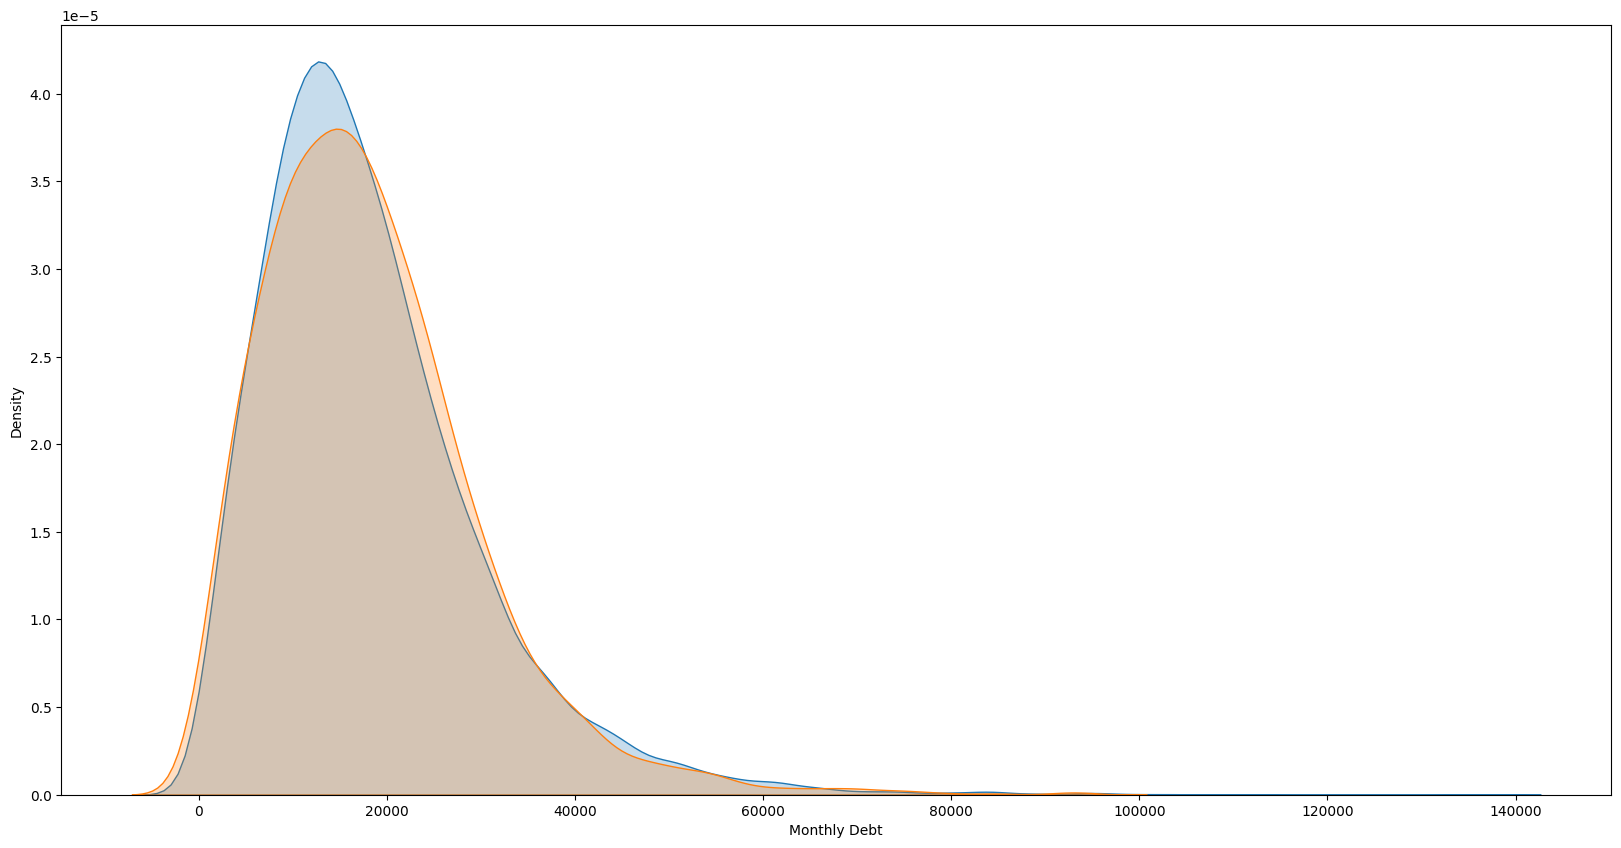

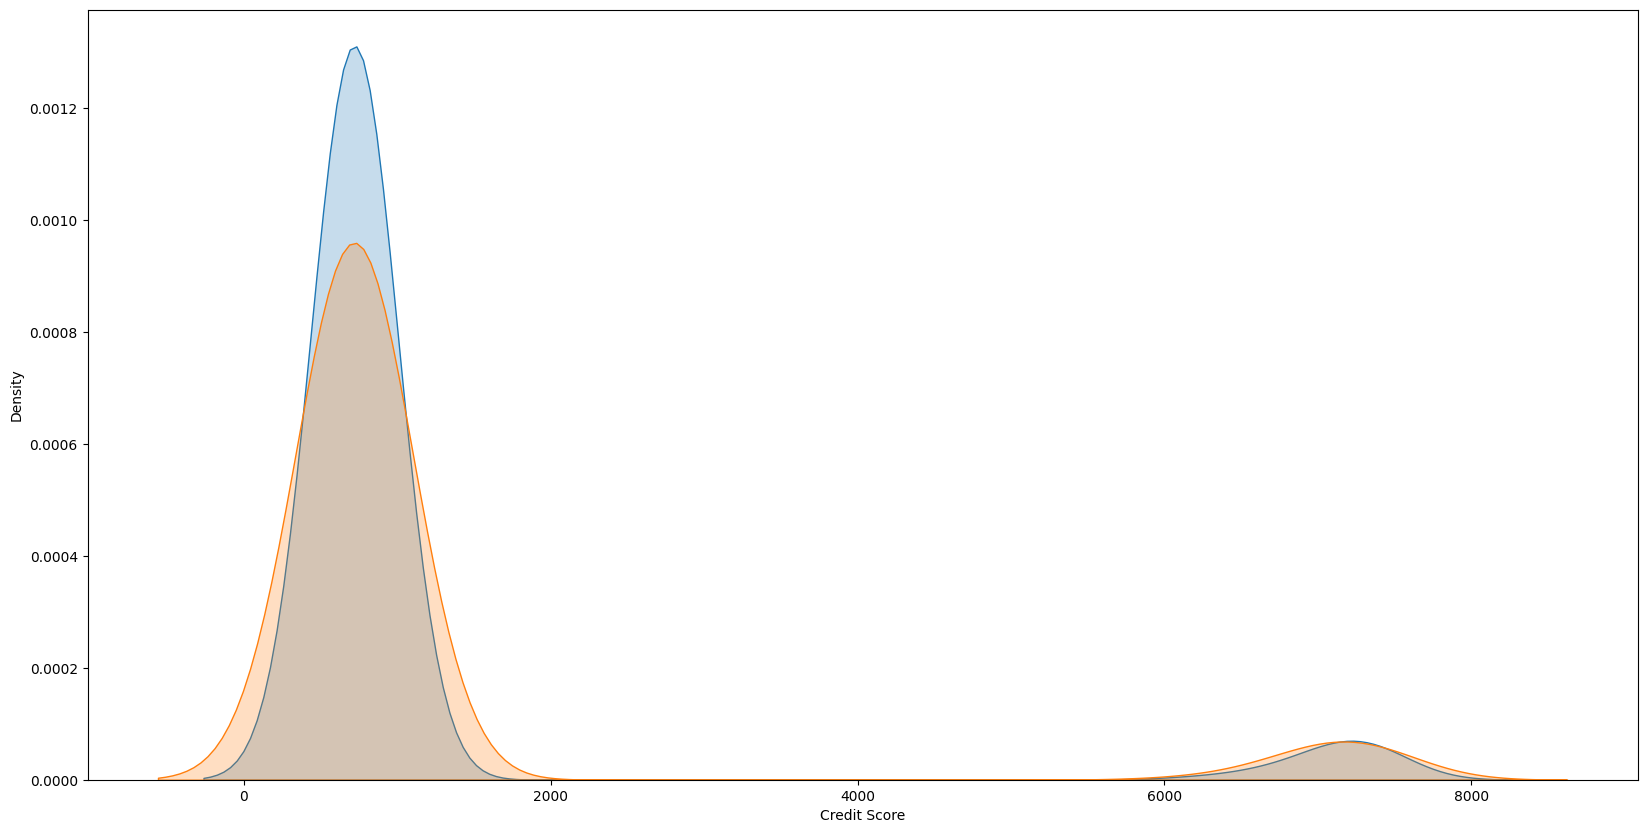

In [91]:
for feature in train.select_dtypes(['float16', 'float32', 'float64']).columns.to_list():
    plt.figure(figsize=(20, 10))
    sns.kdeplot(data = train, x=train.loc[:, feature], fill=True)
    sns.kdeplot(data = test, x=test.loc[:, feature], fill=True)

Везде все +- хорошо кроме Maximum Open Credit